In [128]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2

videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

for index, videoPath in enumerate(videoPaths):
    cap = cv2.VideoCapture(videoPath)

    #some sample constants in openCV, check out for more
    fps = cap.get(cv2.CAP_PROP_FPS)
    cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            videoFrames[str(index+1)].append(frame)
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

    print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))

ppgvideos/1.mp4, Frame Count: 317.0, FPS: 30.0
ppgvideos/2.mp4, Frame Count: 738.0, FPS: 26.16054944243409
ppgvideos/3.mp4, Frame Count: 642.0, FPS: 23.651853557448767


In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
# videoFrames is BGR

In [130]:
npFrames1 = np.asarray(videoFrames["1"])
npFrames2 = np.asarray(videoFrames["2"][0:317])
npFrames3 = np.asarray(videoFrames["3"][0:317])
vidFrames = [npFrames1, npFrames2, npFrames3]


#### B. Sensing Metric [5 points]
Design your sensing metric. Note that each frame is a 2D vector of size [AxB], containing A.B pixels, where a pixel at location [i,j] is denoted by the 3-tuple [B, G, R] where B, G, and R are bytes (8 bits, range 0 - 255) representing intensity of each color - Blue, Green and Red. The frame intensity metric is an aggregate statistical measure on the pixel values. (you can even consider R, G and B streams separately or consider greyscale frames). Best to have a normalized value between zero and one. [5 points]

In [103]:
# Sensory Metric will be average of R values 

"""
    Each frame is a 3D array of HxWx(BGR) 
    we return np array of avg [B, G, R] value of all pixels for a given frame
    NOTE : High Memory and Time consuming function
"""
avgVals1 = np.mean(np.mean(vidFrames[0], axis = 1), axis = 1) / 255
avgVals2 = np.mean(np.mean(vidFrames[1], axis = 1), axis = 1) / 255
avgVals3 = np.mean(np.mean(vidFrames[2], axis = 1), axis = 1) / 255

avgVals = [avgVals1, avgVals2, avgVals3]

#### C. Temporal Variation of Intensity Value [10 points]
Plot your frame intensity metric vs. time for a random 5-second chunk of the three videos. The X-axis should be common for all three subplots (stacked vertically) with separate Y-axes based on your intensity metric. Appreciate the fact that vigorous exercise leads to rapid intensity variations compared to while resting. What is the BPM value for the three cases (manually counting is okay)?

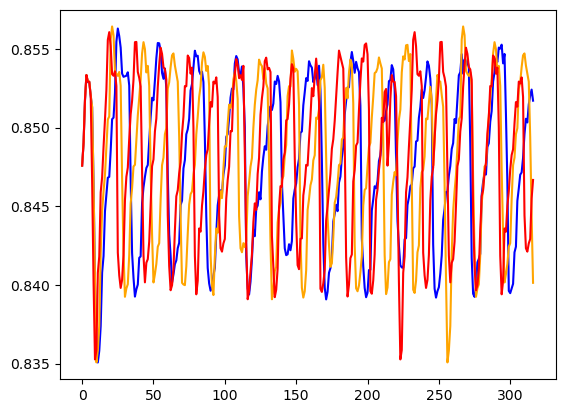

In [105]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments
plt.plot([i[2] for i in avgVals1], color = 'blue')  # resting (BPM = 72)
# plt.show()
plt.plot([i[2] for i in avgVals2], color = 'orange')# mild exercise (BPM = 90)
# plt.show()
plt.plot([i[2] for i in avgVals3], color = 'red')   # severe exercise (BPM = 108)
# plt.show()



#### D. Likelihood Distributions [20 marks]
In the 5-second chunks taken above, choose 20 frames where your sensing metric is close to the local maximum (Case1), and 20 frames where it is close to the local minimum (Case2). Plot the histograms on "R", "G" and "B" values for each pixel in the 20 frames for the two cases 1 and 2. For each video there will be 3 figures, each for "R", "G" and "B". Which one produces the most separable distributions?

In [126]:
# helper function to get all names pointing to the same reference
import inspect
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

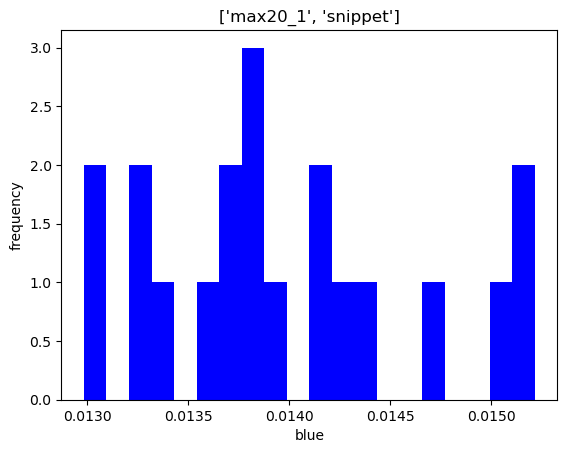

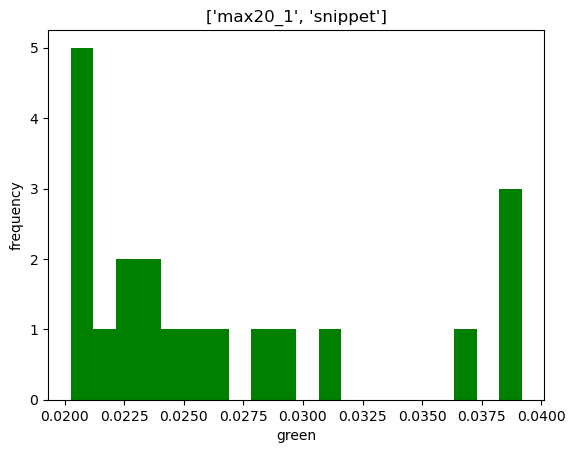

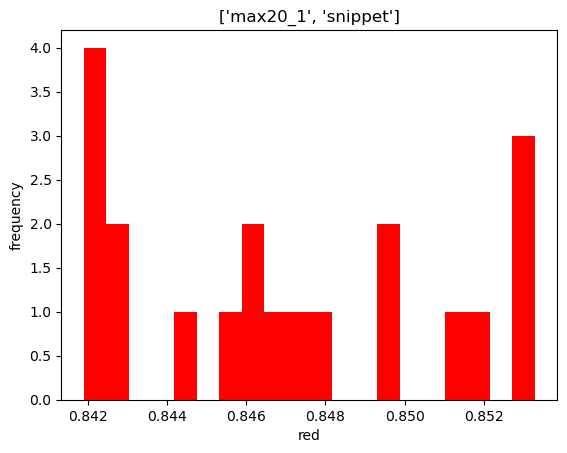

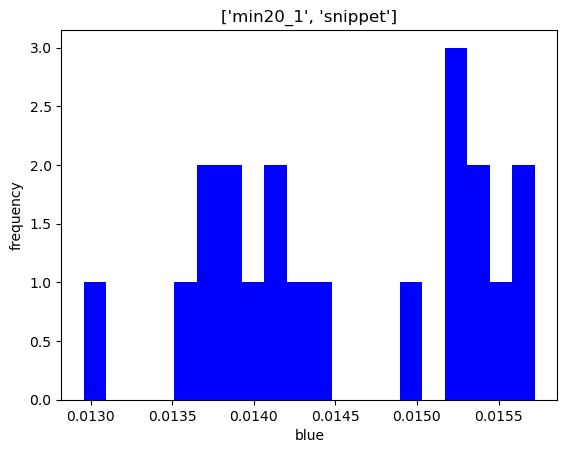

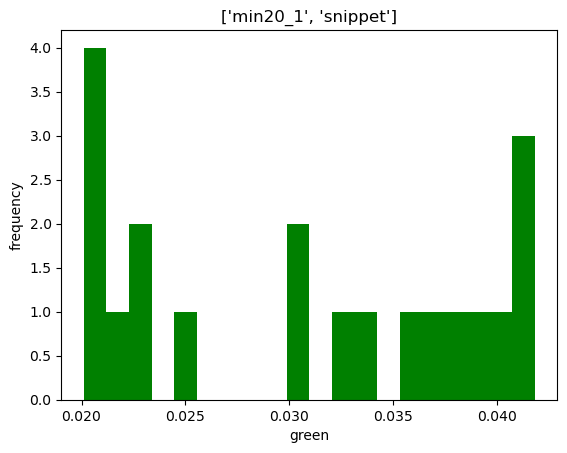

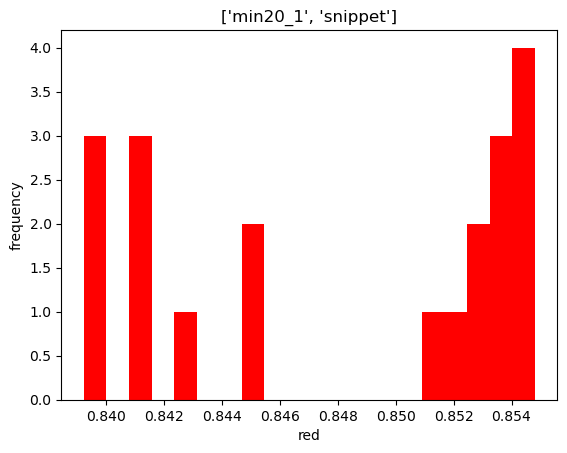

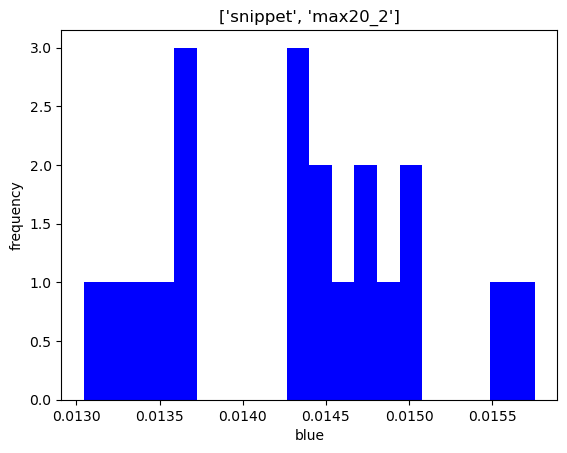

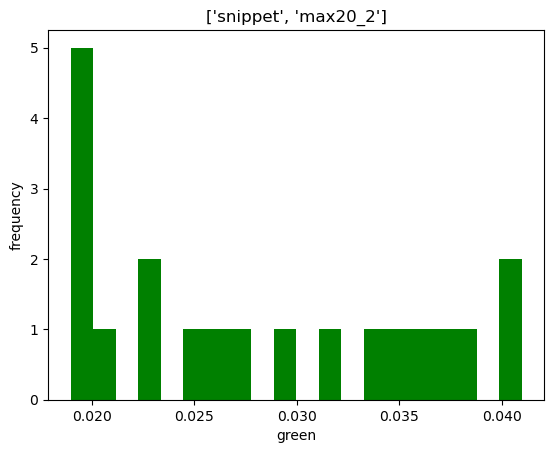

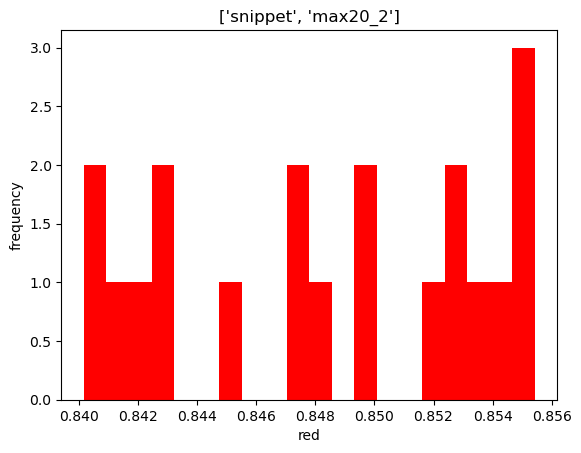

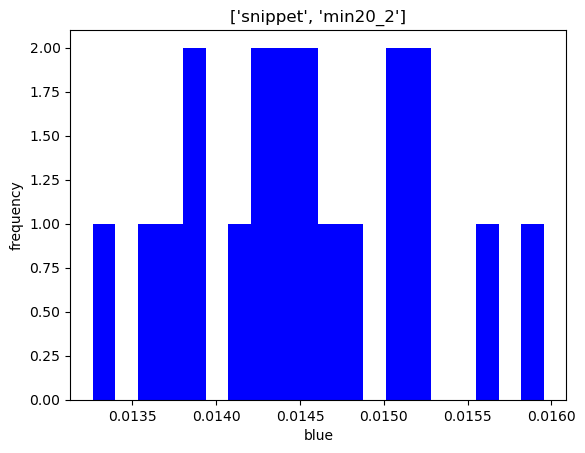

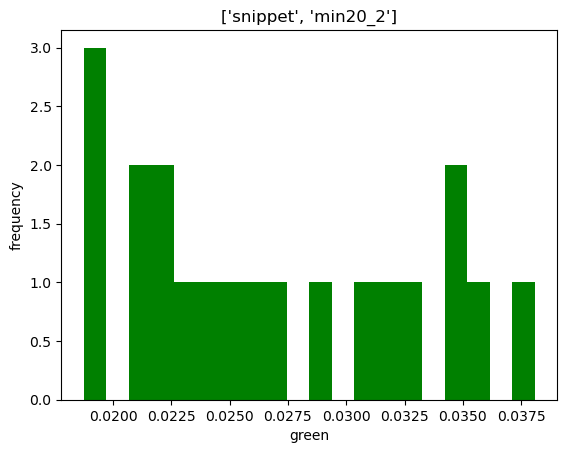

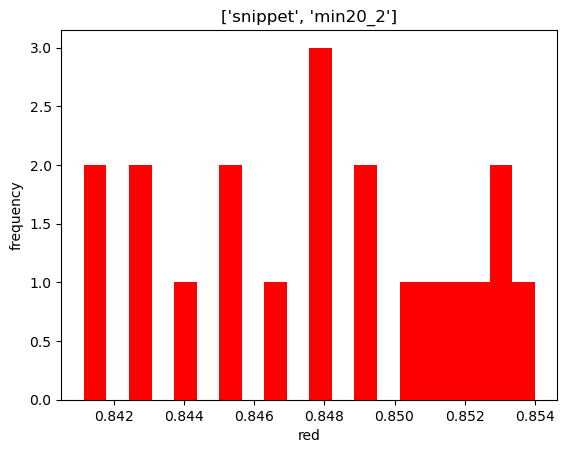

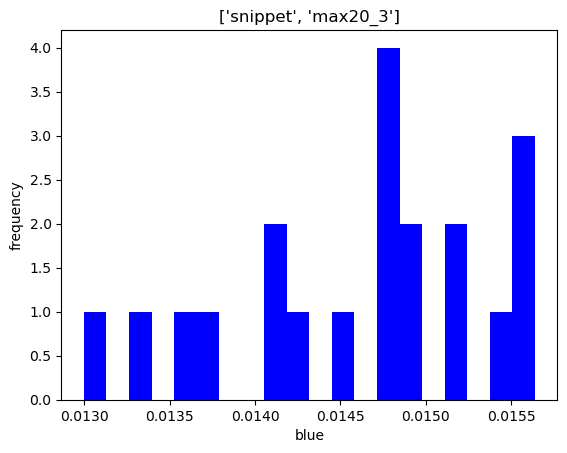

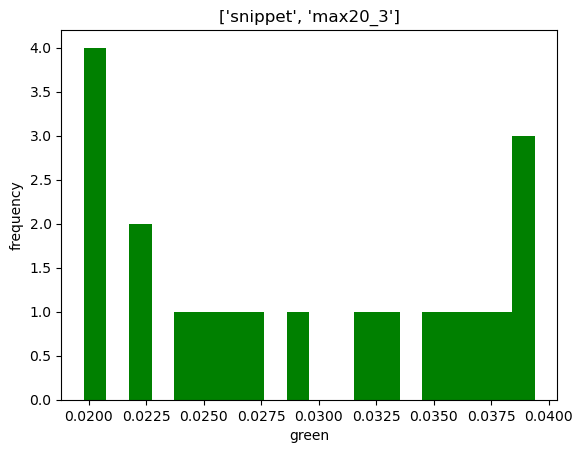

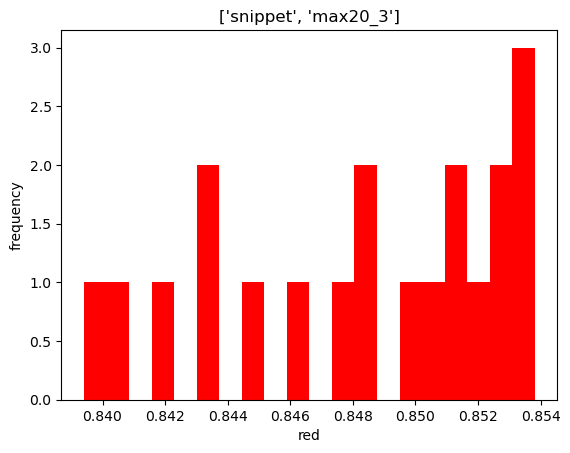

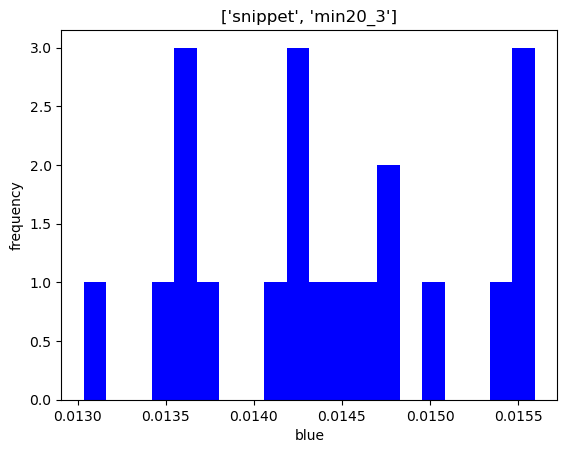

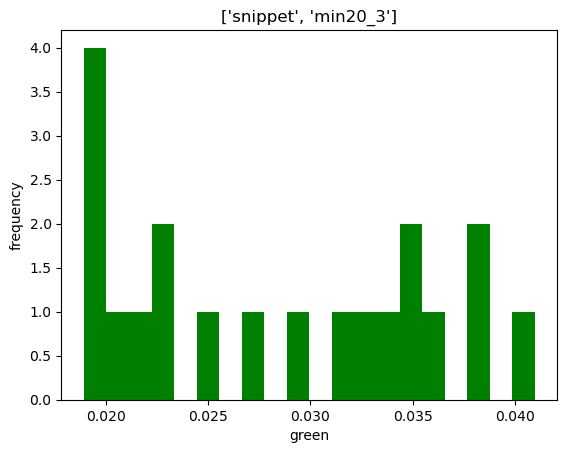

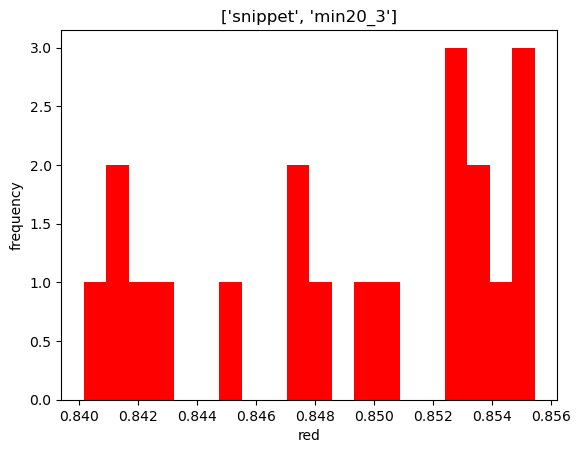

In [127]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

max20_1 = avgVals1[136:156]
min20_1 = avgVals1[185:205]

max20_2 = avgVals2[40:60] 
min20_2 = avgVals2[165:185]

max20_3 = avgVals3[290:310]
min20_3 = avgVals3[250:270]

snippetBegin = [136, 185,40, 167,290, 250]
snippets = [max20_1,min20_1,max20_2,min20_2,max20_3,min20_3]
for s_it in range(len(snippets)):
    snippet = snippets[s_it]
    plt_colors = ["blue", "green", "red"]
    for prim_color in range(3):
        plt.xlabel(plt_colors[prim_color])
        plt.ylabel("frequency")
        plt.title(retrieve_name(snippets[s_it]))
        plt.hist([i[prim_color] for i in snippet], color= plt_colors[prim_color], bins=20)
        plt.show()


#### E. Threshold Based Detection and ROC curve [25 marks]
Only consider the "R" channel for analysis. Suppose, we just use a single pixel (uniformly randomly chosen in the frame) to detect whether the frame belongs to case 1 or case 2. You can denote the "Case 1" to be the POSITIVE event/hypothesis and "Case 2" to be the NEGATIVE event/null hypothesis. For every threshold value, for every frame, choose 500 random pixels. Compute the "Probability of Detection" ($P_D$) and "Probability of False Alarm" ($P_{FA}$). Note that you have (20 + 20) = 40 frames, and 500 detections per frame, i.e., 20000 total detections. Plot the $ROC$ curve. Which one has the best ROC curve (Dataset 1, 2 or 3)?

In [135]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments
ideal_threshold = [0,0,0] # for each video
maxRatio = [-1,-1,-1]  # for each video
detections = [0,0,0,0,0,0]
falseAlarms = [0,0,0,0,0,0]
tholds = [0,0,0]
TP, TN, FP, FN = 0, 0, 0, 0

roc1 = [[], []]
roc2 = [[], []]
roc3 = [[], []]
roc = [roc1, roc2, roc3]
pixelsIndexesInAllFrames = []

N = 256

tpCount, fpCount = 0,0
for unscaledThreshold in range(N): #for each threshold

    for s_it in range(len(snippets)): #for each snippet
        vidIndex = s_it // 2
        vid = vidFrames[vidIndex]
        snippetBeginFrame = snippetBegin[s_it]
        threshold = unscaledThreshold / (N)
        # 500 samples per snippet
        pixelsIndexesInAllFrames = [np.random.randint(0,vid.shape[1] * vid.shape[2],  500) for i in range(20)]
        for frameIndexInSnippet in range(len(pixelsIndexesInAllFrames)):
            frameIndex = frameIndexInSnippet + snippetBeginFrame
            #sample of 500 pixels in a frame
            pixelsIndexesInFrame = pixelsIndexesInAllFrames[frameIndexInSnippet] 
            frameAvg = avgVals[vidIndex][frameIndex][2] # we need only red avg
            for pixelIndex in pixelsIndexesInFrame:
                pixelX = pixelIndex // vid.shape[1]
                pixelY = pixelIndex % vid.shape[1]
                pixel = vid[frameIndex][pixelY][pixelX] / 255
#                 print(pixel , frameAvg, threshold)
#                 bac()
                if(pixel[2] >= threshold and (s_it % 2 == 0)):
                    TP += 1
                if (pixel[2] >= threshold and (s_it % 2 == 1)):
                    FP += 1
                if (pixel[2] < threshold and (s_it % 2 == 0)):
                    FN += 1
                if (pixel[2] < threshold and (s_it % 2 == 1)):
                    TN += 1
        # we need to accumulate over each video (not snippet)
        if(s_it % 2 == 1):
            pd = TP/(TP+FN) if (TP+FN)!=0 else 0
            pfa = FP/(FP+TN) if (FP+TN)!=0 else 0
#             if((TP+FN)!=0 and (FP+TN)!=0):
            roc[vidIndex][1].append(pd)
            roc[vidIndex][0].append(pfa)
            TP, TN, FP, FN = 0, 0, 0, 0
            if(pfa !=0 and pd/pfa > maxRatio[vidIndex]):
                maxRatio[vidIndex] = pd/pfa
                tholds[vidIndex] = unscaledThreshold

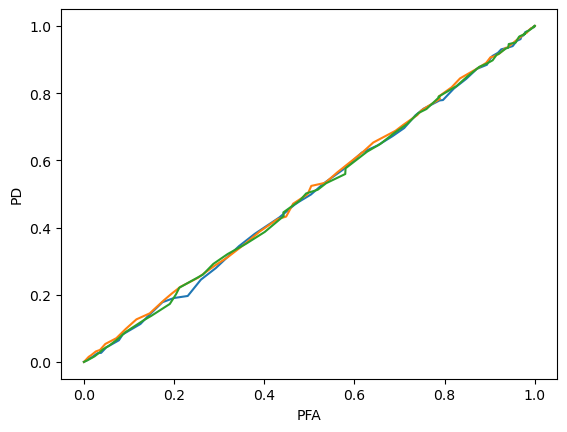

In [150]:
## put your snippet here with complete explanation in comments
plt.xlabel("PFA")
plt.ylabel("PD")

plt.plot(roc[0][0], roc[0][1])
plt.plot(roc[1][0], roc[1][1])
plt.plot(roc[2][0], roc[2][1])

#### F. Are "good" samples spatially correlated? [20 marks]
First, choose an optimal threshold, $T_{OPT}$, that best suits your data (maximize $P_D$ while minimizing $P_{FA}$, you may look into maximizing the $\frac{P_D}{P_{FA}}$ ratio). Out of the 20000 total detections above for $T_{OPT}$, can it be hypothesised that the "good" samples (true positives and true negatives) are spatially clustered in certain areas of the frame, compared to the "bad" samples (false positives and false negatives)?

In [142]:
goodX, badX = [], []
goodY, badY = [], []


for s_it in range(len(snippets)): #for each snippet
    vidIndex = s_it // 2
    vid = vidFrames[vidIndex]
    snippetBeginFrame = snippetBegin[s_it]
    threshold = tholds[vidIndex] / 255
    pixelsIndexesInAllFrames = [np.random.randint(0,vid.shape[1] * vid.shape[2],  500) for i in range(20)]
    for frameIndexInSnippet in range(len(pixelsIndexesInAllFrames)):
        frameIndex = frameIndexInSnippet + snippetBeginFrame
        #sample of 500 pixels in a frame
        pixelsIndexesInFrame = pixelsIndexesInAllFrames[frameIndexInSnippet] 
        frameAvg = avgVals[vidIndex][frameIndex][2] # we need only red avg
        for pixelIndex in pixelsIndexesInFrame:
            pixelX = pixelIndex // vid.shape[1]
            pixelY = pixelIndex % vid.shape[1]
            pixel = vid[frameIndex][pixelY][pixelX] / 255
            pixelX = pixelX
            pixelY = pixelY 
    
            if(pixel[2] >= threshold and (s_it % 2 == 0)):
                goodX.append(pixelX)
                goodY.append(pixelY)
            if (pixel[2] >= threshold and (s_it % 2 == 1)):
                badX.append(pixelX)
                badY.append(pixelY)
            if (pixel[2] < threshold and (s_it % 2 == 0)):
                badX.append(pixelX)
                badY.append(pixelY)
            if (pixel[2] < threshold and (s_it % 2 == 1)):
                goodX.append(pixelX)
                goodY.append(pixelY)
                    
    
    

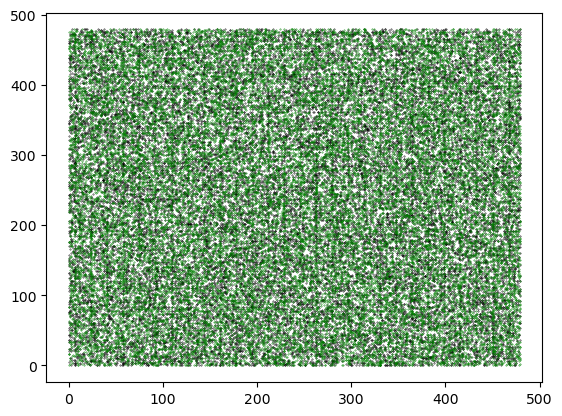

In [147]:
plt.scatter(badX, badY, color = 'black', s = 0.1)
plt.scatter(goodX, goodY, color = 'green', s= 0.1)

#### Submission (report document: 10 marks)
##### Deadline: $4^{th}$, March, 2023
* Compress the top level directory (ZIP format) containing this notebook with filled-in code along with the ppgvideos folder.
* Include a PDF file (10 marks) within the directory, name it "report.pdf". Mention your name and roll number.
* The report should contain explanations related to the above assignments (A through F), assumptions if any, specific code explanations, algorithms used and inferences made from the plots. Also include references if any.
* <b>You MUST not consult your homework code with others</b>. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.
* Submissions after the deadline will not be entertained.